<a href="https://colab.research.google.com/github/rohan-gt/machine-learning-from-scratch/blob/master/Linear%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Elastic-Net

OLS derivation is available [here](https://dustinstansbury.github.io/theclevermachine/derivation-normal-equations)

Gradient Descent derivation is available [here](https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e)

Regularization intuition is available [here](https://medium.com/@kiprono_65591/regularization-a-technique-used-to-prevent-over-fitting-886d5b361700) and [here](https://kevinbinz.com/2019/06/09/regularization/)

Equation:

$h(x) = \theta^Tx$

Cost function (SSE + Regularization):
$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(y^{(i)} - h(x)^{(i)})^2 + \frac{\lambda_1}{m}\sum_{j=1}^n|\theta_j| + \frac{\lambda_2}{2m}\sum_{j=1}^n|\theta_j|^2$

Gradient Descent:
$\theta_j := \theta_j − \frac{\alpha}{m}[\sum_{i=1}^m(y^{(i)} - h(x)^{(i)})⋅x_j^{(i)} + \lambda_1 + \lambda_2\theta]~~~for~j := 0...n$

## Logistic Regression

Gradient descent derivation is available [here](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d)

Equation:

$h_\theta^{(i)}(x) = P(y = i | x; \theta)~~~(for~i=1, 2...n) = \frac{1}{1 + e^{\theta^Tx}}$

Cost function:
$J(\theta) = -\frac{1}{m}\sum_{i=1}^n(y^{(i)}log(h(x)^{(i)}) + (1 - y)log(1 - h(x)^{(i)})) + \frac{\lambda_1}{m}\sum_{j=1}^n|\theta_j| + \frac{\lambda_2}{2m}\sum_{j=1}^n|\theta_j|^2$

Gradient Descent:
$\theta_j := \theta_j − \frac{\alpha}{m}[\sum_{i=1}^m(y^{(i)} - h(x)^{(i)})⋅x_j^{(i)} + \lambda_1 + \lambda_2\theta]~~~for~j := 0...n$

## Implementation

In [64]:
# Import libraries
import numpy as np
import pandas as pd

# Generalized Linear Model
class GeneralizedLinearModel:
      
    def __init__(self, family='gaussian', n_iterations=int(1e6), learning_rate=1e-6,
                 alpha=0, l1_ratio=0.5):
        """Initialize variables"""
          
        # Model parameters
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate 

        # Data
        self.X = self.y = None

        # Training examples and features
        self.m = self.n = 0

        # Model parameters
        self.b = self.W = None
        self.J = list()
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.lambda_l1 = self.alpha * self.l1_ratio
        self.lambda_l2 = self.alpha * (1 - self.l1_ratio)

    def identity(y):
        """Identity link function"""

        return y

    def logit(y):
        """Logit link function"""

        return 1 / (1 + np.exp(-y))

    def predict(self, X):
        """Method for predicting values using features and weights"""
      
        return X.dot(self.W) + self.b

    def calculate_cost(self, y, y_pred):
        """Calculate the value of the cost function"""

        return np.sum((y_pred - y) ** 2) / (2 * self.m)

    def update_weights(self, batch_size=None):
        """Helper function to update weights in gradient descent"""

        # Sample training examples
        if batch_size:
            Xy = np.column_stack([self.X, self.y])
            Xy = Xy[np.random.choice(Xy.shape[0], batch_size, replace=False), :]
            X = Xy[:, :-1]
            y = Xy[:, -1]

        else:
            X = self.X.copy()
            y = self.y.copy()

        # Update training examples
        self.m = batch_size if batch_size else self.m
             
        # Predict
        y_pred = self.predict(X)

        # Calculate cost
        self.J.append(self.calculate_cost(y, y_pred))
          
        # Calculate gradients
        db = np.sum(y_pred - y) / self.m
        dW = ((X.T).dot(y_pred - y) + self.lambda_l1 + (self.lambda_l2 * self.W)) / self.m

        # Update weights
        self.b -= self.learning_rate * db
        self.W -= self.learning_rate * dW
          
    def fit(self, X, y, method='batch gradient descent'):
        """Method for fitting the model to the data""" 

        # Data
        self.X = X
        self.y = y

        # Training examples and features
        self.m = self.X.shape[0]
        self.n = self.X.shape[1]

        # Initialize model weights
        self.b = 0
        self.W = np.zeros(self.n)
        
        # Gradient/coordinate descent
        if method == 'batch descent':
            for i in range(self.n_iterations):
                self.update_weights()

        elif method == 'mini-batch descent':
            for i in range(self.n_iterations):   
                self.update_weights(batch_size=100)

        elif method == 'stochastic descent':
            for i in range(self.n_iterations):
                self.update_weights(batch_size=1)

        # Normal equation (Ordinary Least Squares)
        elif method == 'normal equation':
            self.X = np.hstack((np.ones((self.m, 1)), self.X))
            lambda_l2 = self.lambda_l2 * np.identity(self.n + 1)
            lambda_l2[0][0] = 0
            weights = np.linalg.inv(self.X.T.dot(self.X) - lambda_l2).dot(self.X.T.dot(self.y))
            self.b = weights[0]
            self.W = weights[1:]
              
        return self


## Import data

In [47]:
# Import libraries
from sklearn.datasets import load_boston

# Load Boston House Prices dataset
X, y = load_boston(return_X_y=True)

## Train models and evaluate on test data

In [59]:
# Import libraries
import time
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(  
    X, y, test_size=0.2, random_state=0)
    
# Train models
model_0 = ElasticNet()
start_time = time.time()
model_0.fit(X_train, y_train)
t0 = time.time() - start_time

model_1 = ElasticNetFromScratch(n_iterations=int(1e6), learning_rate=1e-6, alpha=1, l1_ratio=0)
start_time = time.time()
model_1.fit(X_train, y_train, method='batch descent')
t1 = time.time() - start_time

model_2 = ElasticNetFromScratch(n_iterations=int(1e6), learning_rate=1e-6, alpha=1, l1_ratio=0)
start_time = time.time()
model_2.fit(X_train, y_train, method='mini-batch descent')
t2 = time.time() - start_time

model_3 = ElasticNetFromScratch(n_iterations=int(1e6), learning_rate=1e-6, alpha=1, l1_ratio=0)
start_time = time.time()
model_3.fit(X_train, y_train, method='stochastic descent')
t3 = time.time() - start_time

model_4 = ElasticNetFromScratch()
start_time = time.time()
model_4.fit(X_train, y_train, method='normal equation')
t4 = time.time() - start_time

model_5 = ElasticNetFromScratch(n_iterations=int(1e6), learning_rate=1e-6, alpha=1, l1_ratio=0.5)
start_time = time.time()
model_5.fit(X_train, y_train, method='batch descent')
t5 = time.time() - start_time

# Evaluate models
y_test_pred_0 = model_0.predict(X_test)
y_test_pred_0 = np.where(y_test_pred_0 < 0, 0, y_test_pred_0)
print('RMSLE (sklearn):', np.round(np.sqrt(mean_squared_log_error(y_test, y_test_pred_0)), 2))
print('Runtime:', round(t0, 2), 's')

y_test_pred_1 = model_1.predict(X_test)
y_test_pred_1 = np.where(y_test_pred_1 < 0, 0, y_test_pred_1)
print('\nRMSLE (from scratch - Batch Gradient Descent):', np.round(np.sqrt(mean_squared_log_error(y_test, y_test_pred_1)), 2))
print('Runtime:', round(t1, 2), 's')

y_test_pred_2 = model_2.predict(X_test)
y_test_pred_2 = np.where(y_test_pred_2 < 0, 0, y_test_pred_2)
print('\nRMSLE (from scratch - Mini-Batch Gradient Descent):', np.round(np.sqrt(mean_squared_log_error(y_test, y_test_pred_2)), 2))
print('Runtime:', round(t2, 2), 's')

y_test_pred_3 = model_3.predict(X_test)
y_test_pred_3 = np.where(y_test_pred_3 < 0, 0, y_test_pred_3)
print('\nRMSLE (from scratch - Stochastic Gradient Descent):', np.round(np.sqrt(mean_squared_log_error(y_test, y_test_pred_3)), 2))
print('Runtime:', round(t3, 2), 's')

y_test_pred_4 = model_4.predict(X_test)
y_test_pred_4 = np.where(y_test_pred_4 < 0, 0, y_test_pred_4)
print('\nRMSLE (from scratch - Normal Equation):', np.round(np.sqrt(mean_squared_log_error(y_test, y_test_pred_4)), 2))
print('Runtime:', round(t4, 2), 's')

y_test_pred_5 = model_5.predict(X_test)
y_test_pred_5 = np.where(y_test_pred_5 < 0, 0, y_test_pred_5)
print('\nRMSLE (from scratch - Elastic-Net):', np.round(np.sqrt(mean_squared_log_error(y_test, y_test_pred_5)), 2))
print('Runtime:', round(t5, 2), 's')

RMSLE (sklearn): 0.29
Runtime: 0.0 s

RMSLE (from scratch - Batch Gradient Descent): 0.32
Runtime: 42.74 s

RMSLE (from scratch - Mini-Batch Gradient Descent): 0.34
Runtime: 102.79 s

RMSLE (from scratch - Stochastic Gradient Descent): 0.32
Runtime: 80.68 s

RMSLE (from scratch - Normal Equation): 0.32
Runtime: 0.01 s

RMSLE (from scratch - Elastic-Net): 0.32
Runtime: 41.92 s


## Gradient Descent of cost function

### Batch Gradient/Coordinate Descent

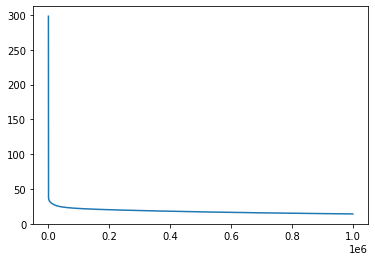

In [49]:
# Plot cost function
pd.Series(model_1.J).plot()

### Mini-Batch Gradient/Coordinate Descent

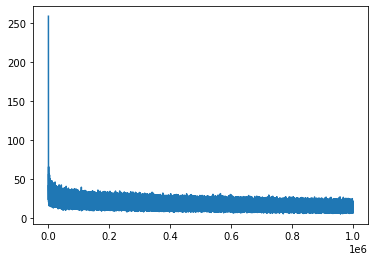

In [50]:
# Plot cost function
pd.Series(model_2.J).plot()

### Stochastic Gradient/Coordinate Descent

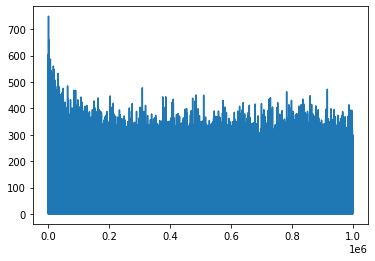

In [51]:
# Plot cost function
pd.Series(model_3.J).plot()

### Elastic-Net

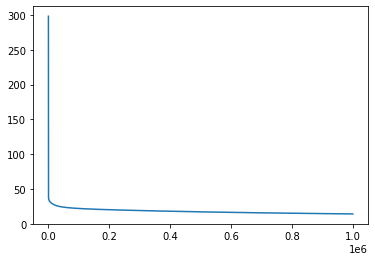

In [52]:
# Plot cost function
pd.Series(model_5.J).plot()